# Birds Data Creation

This notbook specifies and then generates fictional data related to two varieties of birds. There is a "Western Variety" and an "Eastern Varity." The Western birds are smaller and are only black or yellow. The Eastern birds are also Yellow, Black, and also sometimes White.

The fictional data will include information about observations of these birds. Fictional scientists observed the birds and recorded their location including longitude `long` and latitude `lat`. The scientists also recorded the bird's weight `weight`, wing span `wing` , and color `color`.

There are five variables overall. A fifth variable indicates the bird's variety label `variety`.

In [1]:
# Standard Imports
import pandas as pd
import numpy as np

from random import random

import seaborn as sns
%matplotlib inline

## Make Fictional Data

Shown here in "Bird Variety Figure" are general summary statistics associated with two bird varieties. There are the Western variety and the Eastern variety.

![Bird Variety Figure](images/BirdVarietyFigure.png)

The code below generates fictional data that approximates these summary statistics.

## Make Fictional Data

- This code makes fictional data that approximates the population summary statistics shown above in "Bird Variety Figure."
- Longitude and latitude are roughly related to the geographic coordinates associated with the states.
- The weight data is a combined uniform and normal distribution.
- The wing length data is quadratically related to the bird's weight.
- Feather colors are categorical.

In [2]:
# Western variety Latitude & Longitude.
west_lat = np.random.uniform(81, 91, 1000)
west_long = np.random.uniform(35, 42, 1000)

# Specify weight.
west_weight = np.random.uniform(9, 19, 1000)
west_weight = np.random.normal(0, 1.25, 1000) + west_weight

# Specify wing-span (which has a quadratic relationship with weight).
west_wing = np.random.normal(5.979, 1, 1000) + 1.871 * \
            west_weight + -.0396 * west_weight**2

# Specify the feather colors.
west_color = pd.Series(np.random.randint(0, 2, 
                                         1000)).map({0:'Black', 
                                                     1:'Yellow'}).astype('category')

# Eastern variety Latitude & Longitude.
east_lat = np.random.uniform(77, 89, 1000)
east_long = np.random.uniform(34, 39, 1000)

# Specify weight.
east_weight = np.random.uniform(10.5, 24.5, 1000)
east_weight = np.random.normal(0, .66, 1000) + east_weight

# Specify wing-span (which has a quadratic relationship with weight).
east_wing = np.random.normal(24.16, .75, 1000) + -.137 * \
            east_weight + .0119 * east_weight**2

# Specify the feather colors.
east_color = pd.Series(np.random.randint(0, 3, 
                                         1000)).map({0:'Black', 
                                                     1:'Yellow', 
                                                     2:'White'}).astype('category')

## Create A DataFrame

In [3]:
west = pd.DataFrame({'lat':west_lat,'long':west_long,
                     'weight':west_weight, 'wing':west_wing,
                     'color':west_color,'variety':['Western'] * 1000})
east = pd.DataFrame({'lat':east_lat,'long':east_long,
                     'weight':east_weight, 'wing':east_wing,
                     'color':east_color,'variety':['Eastern'] * 1000})
df = pd.concat([west, east])

## Visualize The Results

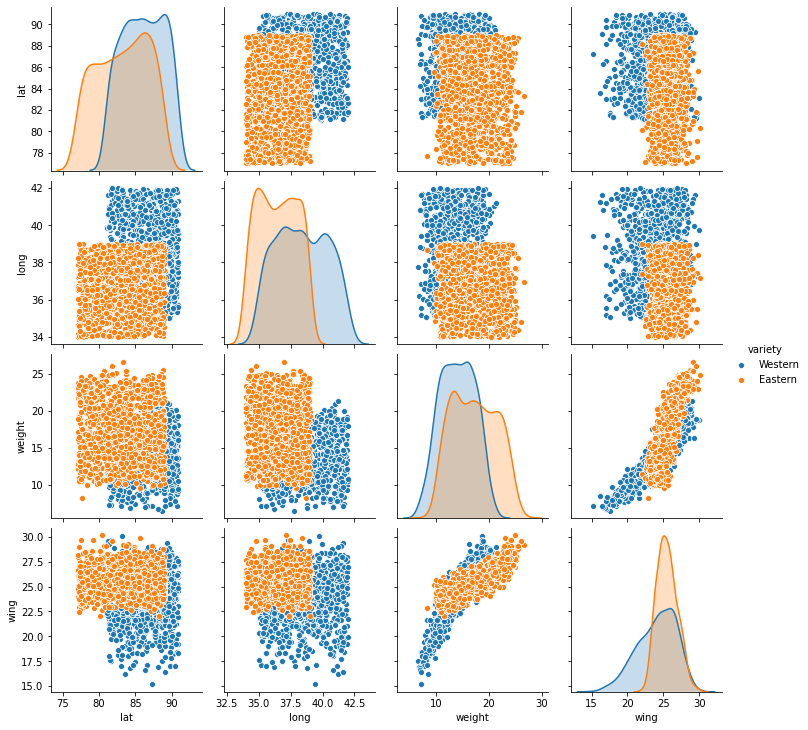

In [4]:
sns.pairplot(df, hue='variety')

## Dave Data To Disk

In [5]:
df.to_csv('BirdVarietyData.csv', index=False)